In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from tensorflow.python.keras.optimizer_v2.adam import Adam
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
print(df.shape)
df = df[df.Class != 2]
df.shape

(1262, 11619)


(949, 11619)

In [3]:
features = df.drop('Class',axis=1)
labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
labels_df = pd.read_csv(labels_dr, sep = ',')
labels = labels_df.iloc[:949,:2]

In [4]:
labels = labels_df.iloc[:949,:2]

In [5]:
n_components = 225
pca = PCA(n_components = n_components).fit(features)
principalComponents = pca.fit_transform(features)
columns = ['Pc' + str(i) for i in range(1,n_components+1)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [6]:
x_train_225, x_test_225, y_train_225, y_test_225 = train_test_split(principalDf, labels, test_size= 0.2, random_state=42)
#x_train_225, x_val_225, y_train_225, y_val_225 = train_test_split(x_train_225, y_train_225, test_size=0.25, random_state= 42)

In [7]:
y_train_225 = y_train_225.astype(int)
y_test_225 = y_test_225.astype(int)
#y_val_225 = y_val_225.astype(int)

## MODEL

In [8]:
opt = tf.keras.optimizers.Adam(0.0001)

In [9]:
# repeat some of the initial values here so we make sure they were not changed
input_dim = principalDf.shape[1]

# let's create a function that creates the model (required for KerasClassifier) 
# while accepting the hyperparameters we want to tune 
# we also pass some default values such as optimizer='rmsprop'
def build_model(optimizer=opt, init_mode='he_uniform'):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(128, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(128, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(256, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(256, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(512, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(512, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer=init_mode, activation='relu'))

    model.add(Dense(64, kernel_initializer=init_mode, activation='relu'))

    model.add(Dense(64, kernel_initializer=init_mode, activation='relu'))

    model.add(Dense(32, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(32, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(2, kernel_initializer=init_mode, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    return model

In [10]:
ckpt = keras.callbacks.ModelCheckpoint(
        filepath='C:/Users/norma/Desktop/BITIRME/Models/MLP/best_model.{epoch:02d}-{val_accuracy:.4f}.h5',
        monitor='val_accuracy', save_best_only=True,verbose=1)

callbacks = [EarlyStopping(monitor='val_accuracy', patience=4, mode='auto', verbose=1, min_delta=0.0001),
         ckpt]

model = build_model(principalDf.shape[1])
history = model.fit(
          x = np.asarray(x_train_225).astype('float32'),
          y = y_train_225,
          steps_per_epoch=len(principalDf)//32,
          validation_data=(x_test_225, y_test_225),
          epochs=50,
          callbacks=[callbacks]
          )
model.save("finishModel.h5")

Epoch 1/50
24/29 [=======================>......] - ETA: 0s - loss: 0.7634 - accuracy: 0.4954
Epoch 1: val_accuracy improved from -inf to 0.49474, saving model to C:/Users/norma/Desktop/BITIRME/Models/MLP\best_model.01-0.4947.h5
29/29 [==============================] - 2s 25ms/step - loss: 0.7511 - accuracy: 0.5072 - val_loss: 0.7075 - val_accuracy: 0.4947
Epoch 2/50
24/29 [=======================>......] - ETA: 0s - loss: 0.7092 - accuracy: 0.5093
Epoch 2: val_accuracy improved from 0.49474 to 0.50000, saving model to C:/Users/norma/Desktop/BITIRME/Models/MLP\best_model.02-0.5000.h5
29/29 [==============================] - 0s 16ms/step - loss: 0.7078 - accuracy: 0.4967 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/50
24/29 [=======================>......] - ETA: 0s - loss: 0.6972 - accuracy: 0.5123
Epoch 3: val_accuracy did not improve from 0.50000
29/29 [==============================] - 0s 11ms/step - loss: 0.6952 - accuracy: 0.5138 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoc

# Model Load

In [24]:
mlp_model = tf.keras.models.load_model("C:/Users/norma/Desktop/BITIRME/Models/mlp2class.h5")

In [17]:
y_pred = model.predict(x_test_225)
y_pred_ = np.argmax(y_pred, axis=1)

class_d = 'C:/Users/norma/Desktop/BITIRME/duzgun_GSE_OrtakData_NormR.csv'
class_df = pd.read_csv(class_d, sep = ';', decimal = ',')
class_df = class_df[class_df.Class != 2]
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(class_df[['Class']]).toarray())
encoder_df.columns = ['AD','CTL']

y_test = encoder.inverse_transform(y_test_225).ravel()

Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.79      0.70        95
           0       0.72      0.54      0.61        95

    accuracy                           0.66       190
   macro avg       0.67      0.66      0.66       190
weighted avg       0.67      0.66      0.66       190



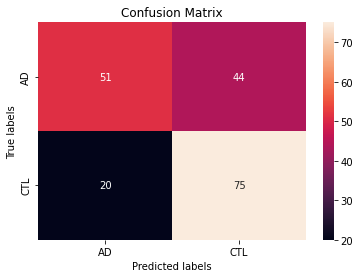

In [18]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred_,labels=[1,0])
print('Classification report : \n',matrix)

labels = ['AD','CTL']
ax= plt.subplot()

# confusion matrix
matrix = confusion_matrix(
    y_test, y_pred_)

sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [15]:
# print("\n")
# print(history.history.keys())

# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# AUC - ROC

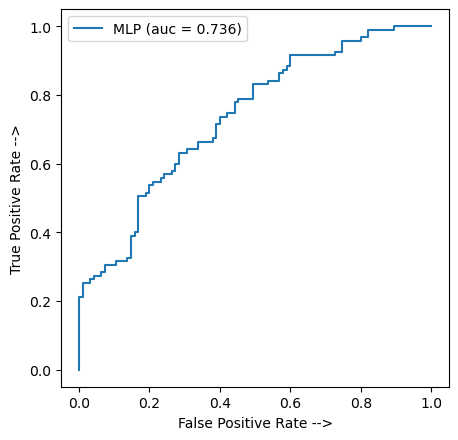

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred[:,1])
auc_mlp = auc(fpr,tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle = '-', label = 'MLP (auc = %0.3f)' % auc_mlp)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Model Save

In [23]:
model.save("C:/Users/norma/Desktop/BITIRME/Models/mlp2class.h5")